## Pandas exercises 1

1. Import dependencies

In [1]:
import pandas as pd

---

In [9]:
ldata = [98, 24, 46, 87, 33]
sdata = pd.Series(ldata)

3. Take the above series and add an index that starts at 2 and steps by 3

In [10]:
index = range(2, 2 + 3*len(sdata), 3)
sdata.index = index

4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [15]:

dudes_dict = {
    'name': ['Agus', 'smiley', 'dude', 'dug'],
    'age': [67, 31, 300, 410],
    'career': ['Rapper', 'NBA All star', 'janitor', 'day trader']
}

df = pd.DataFrame(dudes_dict)

print(df)

     name  age        career
0    Agus   67        Rapper
1  smiley   31  NBA All star
2    dude  300       janitor
3     dug  410    day trader


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [16]:
df.index.name = 'participant_id'
print(df)

                  name  age        career
participant_id                           
0                 Agus   67        Rapper
1               smiley   31  NBA All star
2                 dude  300       janitor
3                  dug  410    day trader


6. Use a pandas function to determine the data types of the columns of `df`.

In [17]:
data_types = df.dtypes

7. Using bracket notation, reference column `name`

In [18]:
namecolumn = df['name']

8. Using dot notation, reference column `name`

In [19]:
namecolumndot = df.name

8. Reference column `name` and have it returned in a dataframe.

In [20]:

namecolumndf = df[['name']]


9. Show the 3rd element in column `career`.

In [21]:
thirdcareerelement = df['career'].iloc[2]


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [22]:
import seaborn as sns
iris = sns.load_dataset('iris')

11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [24]:
speciescorrelation = iris.groupby('species')[['sepal_length', 'sepal_width']].corr().iloc[0::2,-1]
print(speciescorrelation)


species                 
setosa      sepal_length    0.742547
versicolor  sepal_length    0.525911
virginica   sepal_length    0.457228
Name: sepal_width, dtype: float64


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [25]:
highcorrelationspecies = speciescorrelation.idxmax()
print(highcorrelationspecies)
#setosa has highest correlation

('setosa', 'sepal_length')


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [26]:
overallcorrelationmatrix = iris.corr().stack()
mostnegativelycorrelated = overallcorrelationmatrix.idxmin()
speciesnegcorr = iris.groupby('species').corr().stack()
mostnegativelycorrelatedbyspecies = speciesnegcorr.groupby(level=0).idxmin()


print(mostnegativelycorrelated)
print(mostnegativelycorrelatedbyspecies)
#virginia: sepal_length, petal_width etc.

('sepal_width', 'petal_length')
species
setosa            (setosa, sepal_width, petal_length)
versicolor    (versicolor, sepal_length, sepal_width)
virginica      (virginica, sepal_length, petal_width)
dtype: object


<ipython-input-26-cfbee7fddfa6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  overallcorrelationmatrix = iris.corr().stack()


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


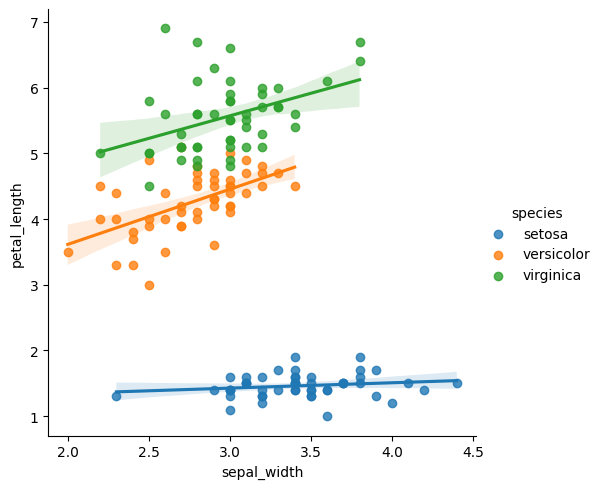

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.lmplot(x='sepal_width', y='petal_length', hue='species', data=iris)


plt.show()